<a href="https://colab.research.google.com/github/JosephPLim/Project-Classification/blob/main/ProjectIIModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project II : Predicting Churn in Telephone Customers
##Student: Joseph Lim

This project aims to predict whether or not telephone customers will "churn" (leave) from a given phone company. The full dataset is [from Kaggle](https://www.kaggle.com/competitions/customer-churn-prediction-2020). Each row represents one customer, their data, and whether or not they churned. 

##Data Loading & Cleaning

###Import Libraries and File

In [1]:
#Basic Pandas and Numpy
import numpy as np
import pandas as pd

#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

#Pre-Processing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

#Classification Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
#Importing Google Colab and Mounting Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Loading Data
filename = "/content/drive/MyDrive/eLearning/CodingDojo - Data Science/Portfolio Projects/train.csv"
df = pd.read_csv(filename)

###Preliminary Data Cleaning
* Duplicate Check
* Categorical Inconsistencies Check
* Numerical Outliers Check
* Missing Values Check



In [4]:
#Currently no columns that need to be removed
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
#Checking for duplicated rows
df.duplicated().sum()

0

In [6]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [7]:
#Checking for inconsistencies in categorical values
for row in df:
  if df[row].dtypes == "object":
    print(df[row].value_counts())
    print("")

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

no     3854
yes     396
Name: international_plan, dtype: int64

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

no     3652
yes     598
Name: churn, dtype: int64



In [8]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
#Checking for missing values
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

##Data Visualizations
* Exploratory (Univariate) Data Analysis
* Explanatory (Multivariate) Data Analysis

###Exploratory Data Analysis (EDA)

In [10]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

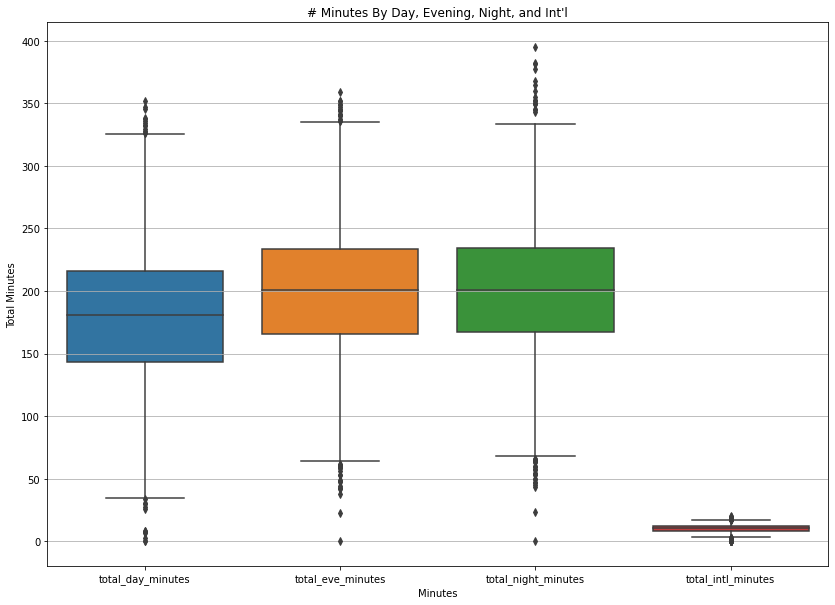

In [11]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.boxplot(data = df[["total_day_minutes", "total_eve_minutes", "total_night_minutes", "total_intl_minutes"]])

plt.title("# Minutes By Day, Evening, Night, and Int'l")
plt.xlabel("Minutes")
plt.ylabel("Total Minutes")
plt.grid(axis = "y")

The averages of minutes for day, evening, and night calls are roughly the same, around 200 total minutes per customers. There are a rather low number of international minutes being taken (< 50 overall).

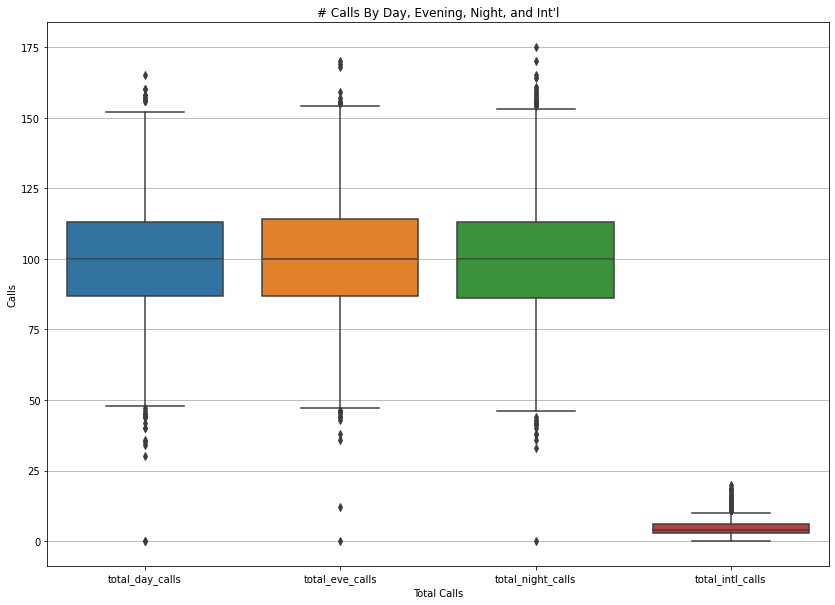

In [12]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.boxplot(data = df[["total_day_calls", "total_eve_calls", "total_night_calls", "total_intl_calls"]])

plt.title("# Calls By Day, Evening, Night, and Int'l")
plt.xlabel("Total Calls")
plt.ylabel("Calls")
plt.grid(axis = "y")

This shows that the average number of calls was roughly the same for day, evening, and night calls. However, there was a much lower number of international calls. I might end up removing the number of international calls column as a result of the very low number on average of them. 

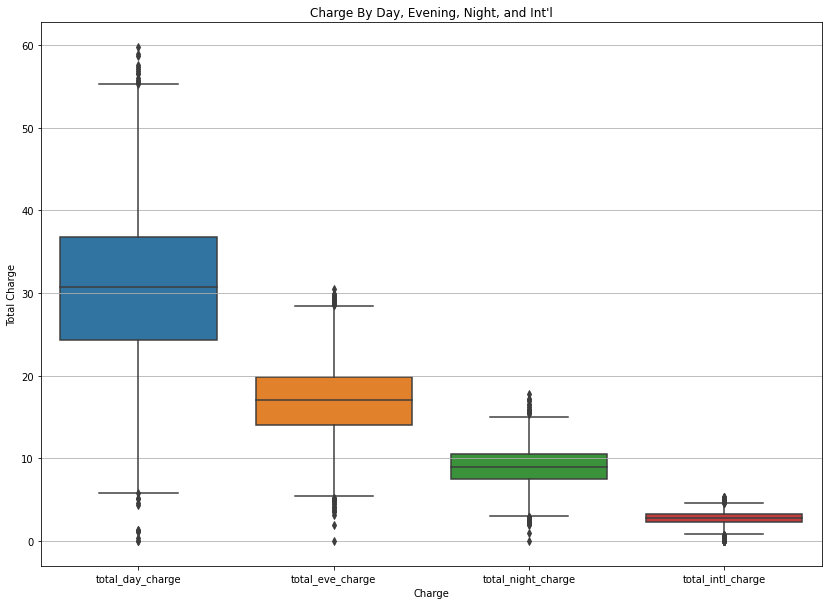

In [13]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.boxplot(data = df[["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"]])

plt.title("Charge By Day, Evening, Night, and Int'l")
plt.xlabel("Charge")
plt.ylabel("Total Charge")
plt.grid(axis = "y")

This shows that customers paid the most on average for day calls. They also paid the least for international calls.

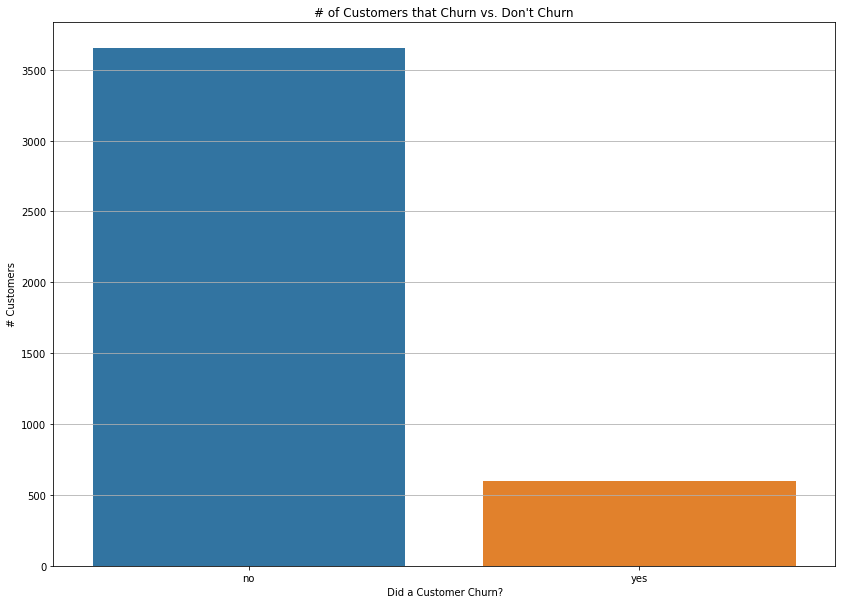

In [14]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.countplot(x = df["churn"])
plt.title("# of Customers that Churn vs. Don't Churn")
plt.xlabel(" Did a Customer Churn?")
plt.ylabel("# Customers")
plt.grid(axis = "y")

We can see here that the number of customers who churned were significantly less than those that did not churn. We should most likely stratify when we do a train-test split.

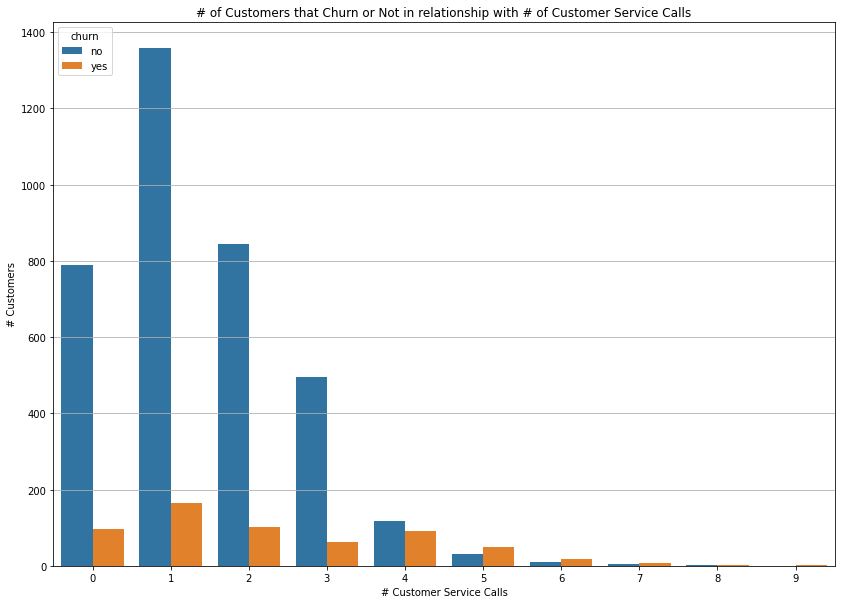

In [15]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.countplot(data = df, x = "number_customer_service_calls", hue = "churn")

plt.title("# of Customers that Churn or Not in relationship with # of Customer Service Calls")
plt.xlabel("# Customer Service Calls")
plt.ylabel("# Customers")
plt.grid(axis = "y")

We can see here that some customers churn without making customer service calls. We can also see that there are less and less customers who make customer service calls after they make 1 customer service call. This seems to suggest that the more calls to customer service a customer makes, the more a customer is likely to churn.

### Explanatory Data Analysis

In [16]:
df_eda = df.copy()

In [17]:
df_eda["churn"] = df_eda["churn"].replace({"no": 0, "yes": 1})
df_eda["churn"] = df_eda["churn"].astype(int)

Text(0.5, 1.0, 'Correlations between numerical values')

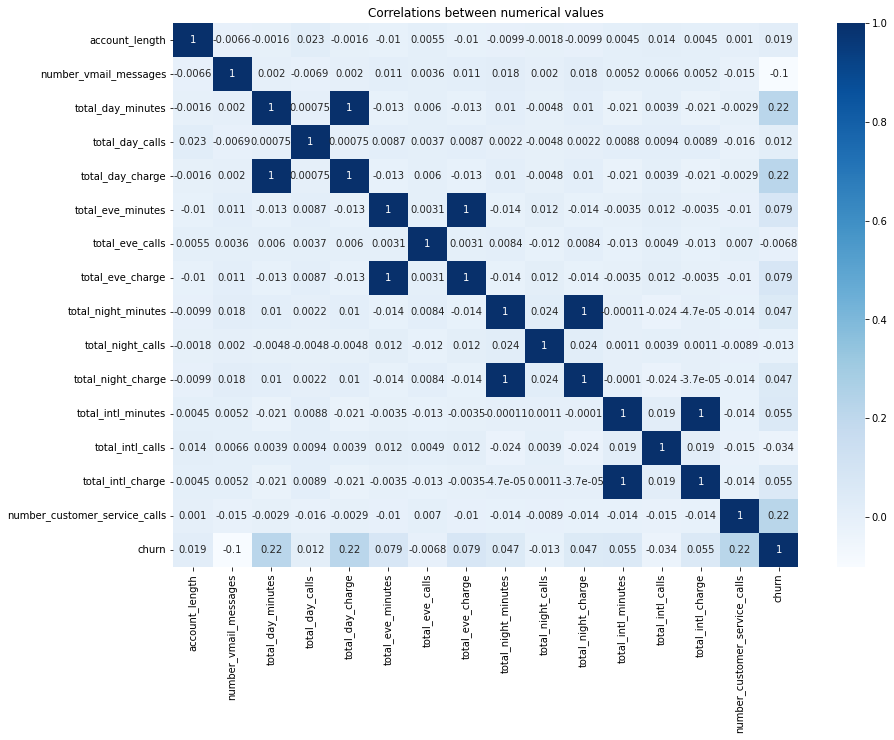

In [18]:
fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(df_eda.corr(), cmap = 'Blues', annot = True, ax = ax)
plt.title("Correlations between numerical values")

From the heatmap, we can see that there seems to be a correlation between whether a customer churns, the number of customer service calls the customer makes, and the total charge/minutes the customer makes per day.

While there is a 1:1 correlation between certain variables, looking at the data dictionary shows that those correlations are between related variables (ex: # int'l minutes, and the charge for int'l minutes). There should be no need to show a 1:1 relationship like this.

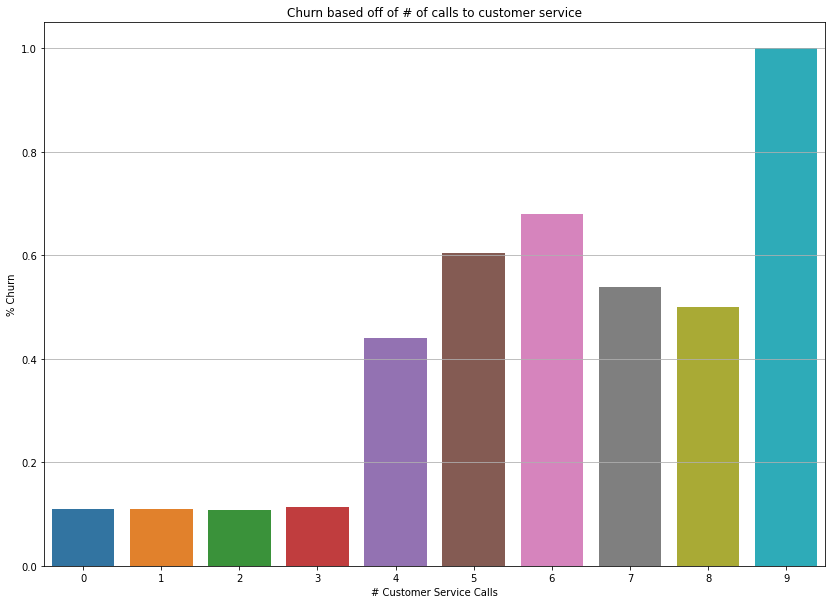

In [19]:
fig, ax = plt.subplots(figsize = (14,10))

sns.barplot(data = df_eda, x = "number_customer_service_calls", y = "churn", ci = None)

plt.title("Churn based off of # of calls to customer service")
plt.xlabel("# Customer Service Calls")
plt.ylabel("% Churn")
plt.grid(axis = "y")

We can see that after 3 customer service calls, the percentage of people who churn rises by above 30%. We also see that at 9 customer service calls, customers absolutely churn.

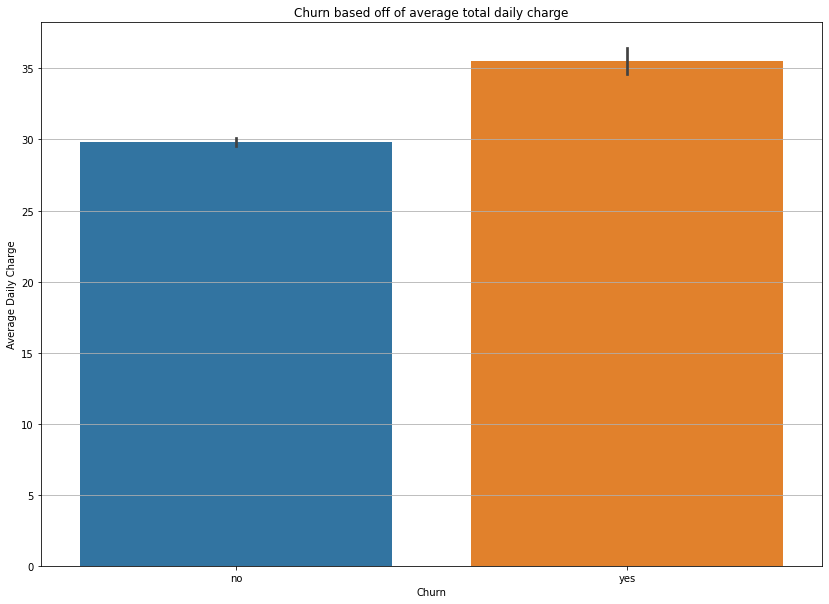

In [20]:
#Demonstrate the relationship between churn and total day charge
fig, ax = plt.subplots(figsize = (14,10))

sns.barplot(data = df, x = "churn", y = "total_day_charge")

plt.title("Churn based off of average total daily charge")
plt.xlabel("Churn")
plt.ylabel("Average Daily Charge")
plt.grid(axis = "y")

We can see that on average, customers that churn tend to pay more than customers who do not churn.

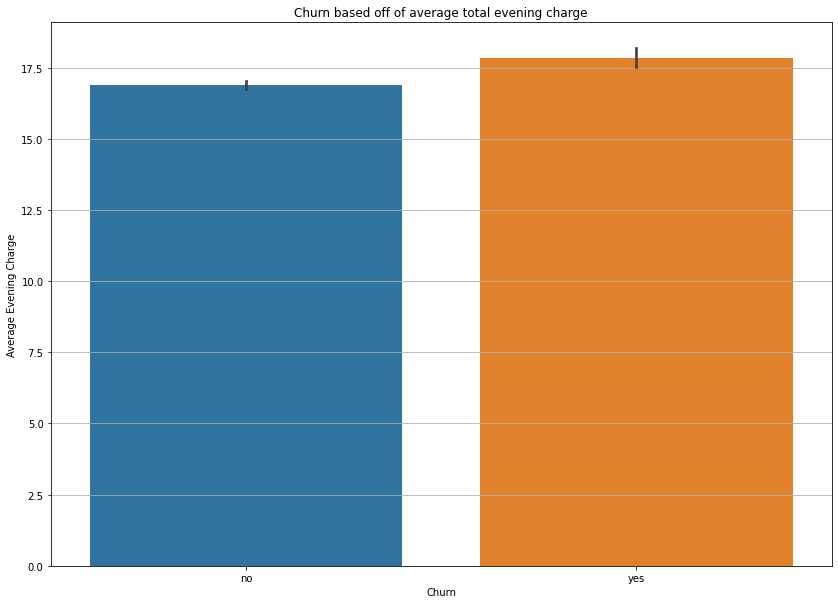

In [21]:
#Demonstrate the relationship between churn and total evening charge
fig, ax = plt.subplots(figsize = (14,10))

sns.barplot(data = df, x = "churn", y = "total_eve_charge")

plt.title("Churn based off of average total evening charge")
plt.xlabel("Churn")
plt.ylabel("Average Evening Charge")
plt.grid(axis = "y")

We see that customers that do and do not churn, both pay roughly around $17.50

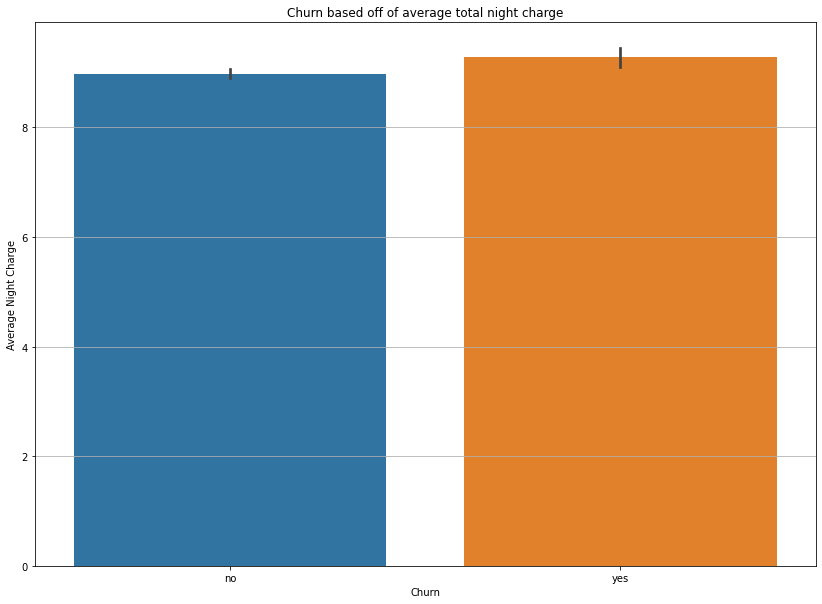

In [22]:
#Demonstrate the relationship between churn and total evening charge
fig, ax = plt.subplots(figsize = (14,10))

sns.barplot(data = df, x = "churn", y = "total_night_charge")

plt.title("Churn based off of average total night charge")
plt.xlabel("Churn")
plt.ylabel("Average Night Charge")
plt.grid(axis = "y")

We see that customers that do and do not churn, pay roughly around $9 on average.

## Modelling

* Model Validation Data Split
* Preprocessing
* Model #1
  * Tune Model with GridSearchCV
  * PCA
* Model #2
  * Tune Model with GridSearchCV
  * PCA
* Model Selection



In [23]:
## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize=None, classes=None, figsize=(20,5)):
  """Takes as arguments: a model, features, and labels
  Prints a classification report, confusion matrix
  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure"""
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize)
  plt.show()

### Model Validation Data Split

In [24]:
#Determining if there is proper balance of target values
print(df["churn"].value_counts(normalize = False))
print(df["churn"].value_counts(normalize = True))

no     3652
yes     598
Name: churn, dtype: int64
no     0.859294
yes    0.140706
Name: churn, dtype: float64


In [25]:
#Preparing Data for split
X = df.drop(columns = "churn")
y = df["churn"]

#Splitting data, stratifying due to imbalance in target values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

###Preprocessing
* Creating Scaler, One Hot Encoder, and hard coding Ordinal data
* Transforming columns
* Creating Pipeline(s)

In [26]:
#Creating StandardScaler
scaler = StandardScaler()

#Creating column selector for numbers
num_selector = make_column_selector(dtype_include='number')

#Creating number tuple for later pipeline processing
number_tuple = (scaler, num_selector)

In [27]:
#Creating OneHotEncoder for categorical variables
ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

#Creating column selector for categoricals
cat_selector = make_column_selector(dtype_include = "object")

#Creating categorical tuple for later pipeline processing
cat_tuple =  (ohe, cat_selector)

In [28]:
#Creating Preprocessor
preprocessor = make_column_transformer(number_tuple,
                                       cat_tuple,
                                       remainder = "drop")

### Model 1: Logistic Regression
* Base Model
* Model Tuned with GridSearch CV and PCA

#### Base Model

              precision    recall  f1-score   support

          no       0.88      0.95      0.92       913
         yes       0.45      0.23      0.31       150

    accuracy                           0.85      1063
   macro avg       0.67      0.59      0.61      1063
weighted avg       0.82      0.85      0.83      1063



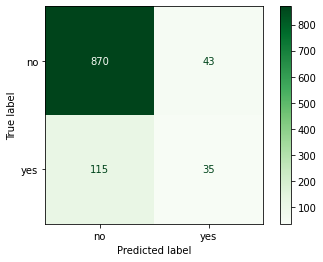

In [29]:
#Creating Instance of Logistic Regression
logreg = LogisticRegression()

# Putting logreg and preprocessor into a pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)

## Display the Model's metrics
evaluate_classification(logreg_pipe, X_test, y_test)

#### Tuned Model

In [30]:
#Creating PCA, with emphasis on as high amount of accuracy as possible
pca = PCA(n_components = 0.95)

#Creating new pipelines for Tuning
logregl1_tuned_pipe = make_pipeline(preprocessor, pca, LogisticRegression(penalty = "l1", solver = "liblinear"))
logregl2_tuned_pipe = make_pipeline(preprocessor, pca, LogisticRegression(penalty = "l2"))

#Getting list of params for tuning
logregl1_tuned_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fa943dafcd0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fa94110bdc0>)])),
  ('pca', PCA(n_components=0.95)),
  ('logisticregression',
   LogisticRegression(penalty='l1', solver='liblinear'))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa943dafcd0>),
                                 ('onehotencoder',
                               

In [31]:

c_values = []
for i in range(-4, 3):
  c_values.append(10**i)
solverl2 = ["newton-cg", "lbfgs"]
#Creating param_list
param_gridl2 = {
    'logisticregression__C': c_values,
    'logisticregression__solver': solverl2
}
param_gridl1 = {'logisticregression__C': c_values}

grid_pipel1 = GridSearchCV(logregl1_tuned_pipe, param_grid = param_gridl1)
grid_pipel2 = GridSearchCV(logregl2_tuned_pipe, param_grid = param_gridl2)

In [32]:
grid_pipel1.fit(X_train, y_train)
grid_pipel2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa943dafcd0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa94110bdc0>)])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100],
                         'logisticregression__solver': ['newton-cg', 'lbfgs']})

In [33]:
best_estimatorl1 = grid_pipel1.best_estimator_
print(best_estimatorl1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa940fdd760>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa940fddb20>)])),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])


              precision    recall  f1-score   support

          no       0.88      0.97      0.92       913
         yes       0.49      0.18      0.26       150

    accuracy                           0.86      1063
   macro avg       0.68      0.57      0.59      1063
weighted avg       0.82      0.86      0.83      1063



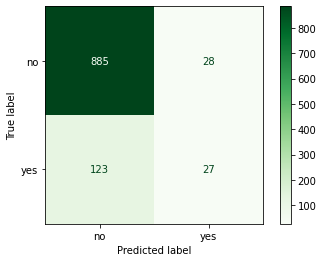

In [34]:
logregl1_tuned_pipe = make_pipeline(preprocessor, pca, LogisticRegression(C = 0.1, penalty = "l1", solver = "liblinear"))
logregl1_tuned_pipe.fit(X_train, y_train)
evaluate_classification(logregl1_tuned_pipe, X_test, y_test)

In [35]:
best_estimatorl2 = grid_pipel2.best_estimator_
print(best_estimatorl2)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa940dfffd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa940dff310>)])),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='newton-cg'))])


              precision    recall  f1-score   support

          no       0.88      0.96      0.92       913
         yes       0.44      0.19      0.26       150

    accuracy                           0.85      1063
   macro avg       0.66      0.57      0.59      1063
weighted avg       0.82      0.85      0.83      1063



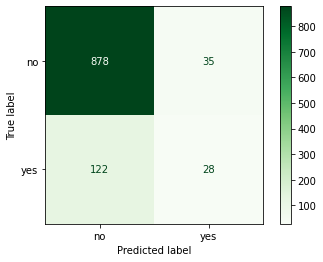

In [36]:
logregl2_tuned_pipe = make_pipeline(preprocessor, pca, LogisticRegression(C = 0.1, solver = "newton-cg", penalty = "l2"))
logregl2_tuned_pipe.fit(X_train, y_train)
evaluate_classification(logregl2_tuned_pipe, X_test, y_test)

### Model 2: Decision Tree
* Base Model
* Model Tuned with GridSearchCV and PCA

#### Base Model

              precision    recall  f1-score   support

          no       0.94      0.94      0.94       913
         yes       0.65      0.66      0.66       150

    accuracy                           0.90      1063
   macro avg       0.80      0.80      0.80      1063
weighted avg       0.90      0.90      0.90      1063



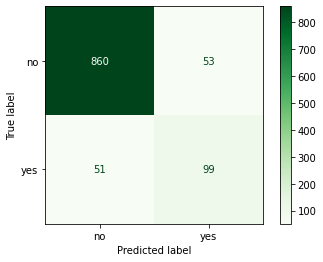

In [37]:
#Creating Decision Tree Classifier

#model instance
dec_tree = DecisionTreeClassifier(random_state = 42)

dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

#fitting the model
dec_tree_pipe.fit(X_train, y_train)

evaluate_classification(dec_tree_pipe, X_test, y_test)

#### Tuned Model

In [38]:
#Creating PCA, with emphasis on as high amount of accuracy as possible
pca = PCA(n_components = 0.95)

#Creating new pipelines for Tuning
dec_tree_tuned_pipe = make_pipeline(preprocessor, pca, dec_tree)

#Getting list of params for tuning
dec_tree_tuned_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fa943dafcd0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fa94110bdc0>)])),
  ('pca', PCA(n_components=0.95)),
  ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa943dafcd0>),
                                 ('onehotencoder',
                                  OneHotEnc

In [39]:
#Creating param_list
param_grid = {
    'decisiontreeclassifier__max_depth': range(10,100, 10),
    'decisiontreeclassifier__max_leaf_nodes': range(30,300,10),
}

grid_pipe = GridSearchCV(dec_tree_tuned_pipe, param_grid = param_grid)


In [ ]:
grid_pipe.fit(X_train, y_train)

In [ ]:
best_estimator = grid_pipe.best_estimator_
print(best_estimator)

In [ ]:
#Tuned model Instance
dec_tree = DecisionTreeClassifier(max_depth = 20, max_leaf_nodes = 50, random_state = 42)

dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

#fitting the model
dec_tree_pipe.fit(X_train, y_train)

evaluate_classification(dec_tree_pipe, X_test, y_test)

###Model Selection

In [ ]:
#l1 Logistic Regression Model
evaluate_classification(logregl1_tuned_pipe, X_test, y_test)

In [ ]:
#Decision Tree Model
evaluate_classification(dec_tree_pipe, X_test, y_test)

#### <center>Justification</center>
When determining whether a customer will churn, I believe the client is most interested in accuracy. Therefore the basic decision tree model, which has the highest accuracy (at 94%), is chosen.